# Padded 1D 'column_maxes' signals

In [2]:
import sys
sys.path.append('..')

import uproot

import numpy as np
import pandas as pd
import awkward as ak
import matplotlib.pyplot as plt
import seaborn as sns

from skimage.measure import label, regionprops
from scipy.ndimage import label as scipy_label
from collections import deque

from lariat import Event

In [15]:
# Threshold = 15, all connected regions. 
allclusters = pd.read_pickle("/Users/user/data/research/proton-deuteron/csv/allclusters.pkl")

# Cleaning

- length over 5 wires.

In [54]:
print(allclusters.shape)
allclusters = allclusters[allclusters['column_maxes'].map(len) > 10].reset_index(drop=True); print(allclusters.shape)

(87273, 27)
(70922, 27)


In [55]:
allclusters.describe()

,event_idx,run,subrun,event,event_index,cluster_idx,area,max_intensity,min_intensity,mean_intensity,...,centroid_x,centroid_y,bbox_min_row,bbox_min_col,bbox_max_row,bbox_max_col,width,height,aspect_ratio,compactness
count,70922.000000,70922.000000,70922.000000,70922.000000,70922.000000,70922.000000,70922.000000,70922.000000,70922.000000,70922.000000,...,70922.000000,70922.000000,70922.000000,70922.000000,70922.000000,70922.000000,70922.000000,70922.000000,70922.000000,70922.000000
mean,3569.440385,9162.896971,181.005175,15761.972124,0.202448,14.664519,3804.938031,255.512055,16.000127,62.785274,...,96.854315,1370.555077,54.300795,1260.438284,139.625349,1490.783537,230.345253,85.324554,4.083365,0.255385
std,2062.730808,436.903703,133.143643,11933.709622,0.471958,35.012518,5090.749907,195.276959,0.012453,30.400408,...,51.895531,757.965514,54.504024,770.850172,67.826323,755.235368,203.807723,66.519643,4.411272,0.145331
min,0.000000,8557.000000,1.000000,11.000000,0.000000,0.000000,20.000000,18.000000,16.000000,16.375000,...,3.287313,0.800000,0.000000,0.000000,11.000000,4.000000,3.000000,11.000000,0.147826,0.016106
25%,1772.000000,8681.000000,67.000000,5692.000000,0.000000,0.000000,1002.000000,116.000000,16.000000,38.685857,...,51.402100,870.247113,20.000000,740.000000,75.000000,1015.000000,105.000000,28.000000,1.632088,0.141910
50%,3545.000000,9452.000000,154.000000,13217.500000,0.000000,2.000000,2311.000000,212.000000,16.000000,54.544794,...,92.251308,1221.996050,29.000000,1127.000000,136.000000,1335.000000,177.000000,61.000000,2.906250,0.224961
75%,5341.750000,9510.000000,278.000000,23421.000000,0.000000,13.000000,4776.000000,333.000000,16.000000,80.622537,...,130.313502,1819.151759,73.000000,1714.000000,208.000000,1944.000000,288.000000,140.000000,4.894737,0.344149
max,7635.000000,9788.000000,624.000000,52920.000000,5.000000,507.000000,184515.000000,2354.000000,18.000000,352.780189,...,234.916084,3070.625000,229.000000,3069.000000,240.000000,3072.000000,3072.000000,240.000000,132.384615,0.901010


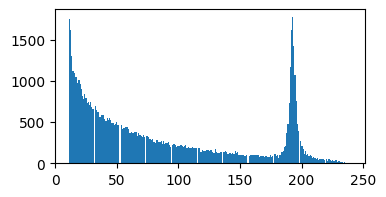

In [56]:
plt.figure(figsize=(4,2)); plt.hist(allclusters['column_maxes'].apply(len), bins=240); plt.show()

62250


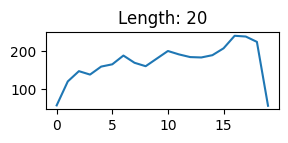

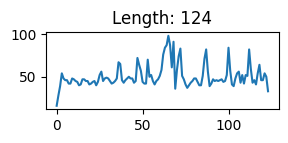

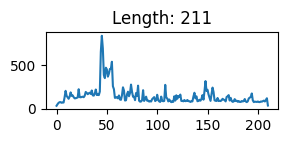

In [ ]:
sample = allclusters['column_maxes'].sample(3)

for i, sample in enumerate(sample):
    plt.figure(figsize=(3,1)); plt.plot(sample); plt.title(f"Length: {len(sample)}") 

# Padding function for 'column_maxes'

In [35]:
def padding(column_maxes, min, max, target=240):
    
    signal = np.array(column_maxes); length = len(signal)
    zeros = np.zeros(target)
    span = max - min + 1
    
    if length != span:
        if abs(length - span) > 2:
            print(f"Length {length} != Span {span}")
    
    start = min
    end = min + length

    zeros[start:end] = signal[0:length]
    
    padded = zeros

    return padded

In [36]:
data = []

for idx, row in allclusters.iterrows():
    padded_signal = padding(
        row['column_maxes'],
        row['bbox_min_row'],
        row['bbox_max_row']
    )
    data.append(padded_signal)

data = np.array(data)

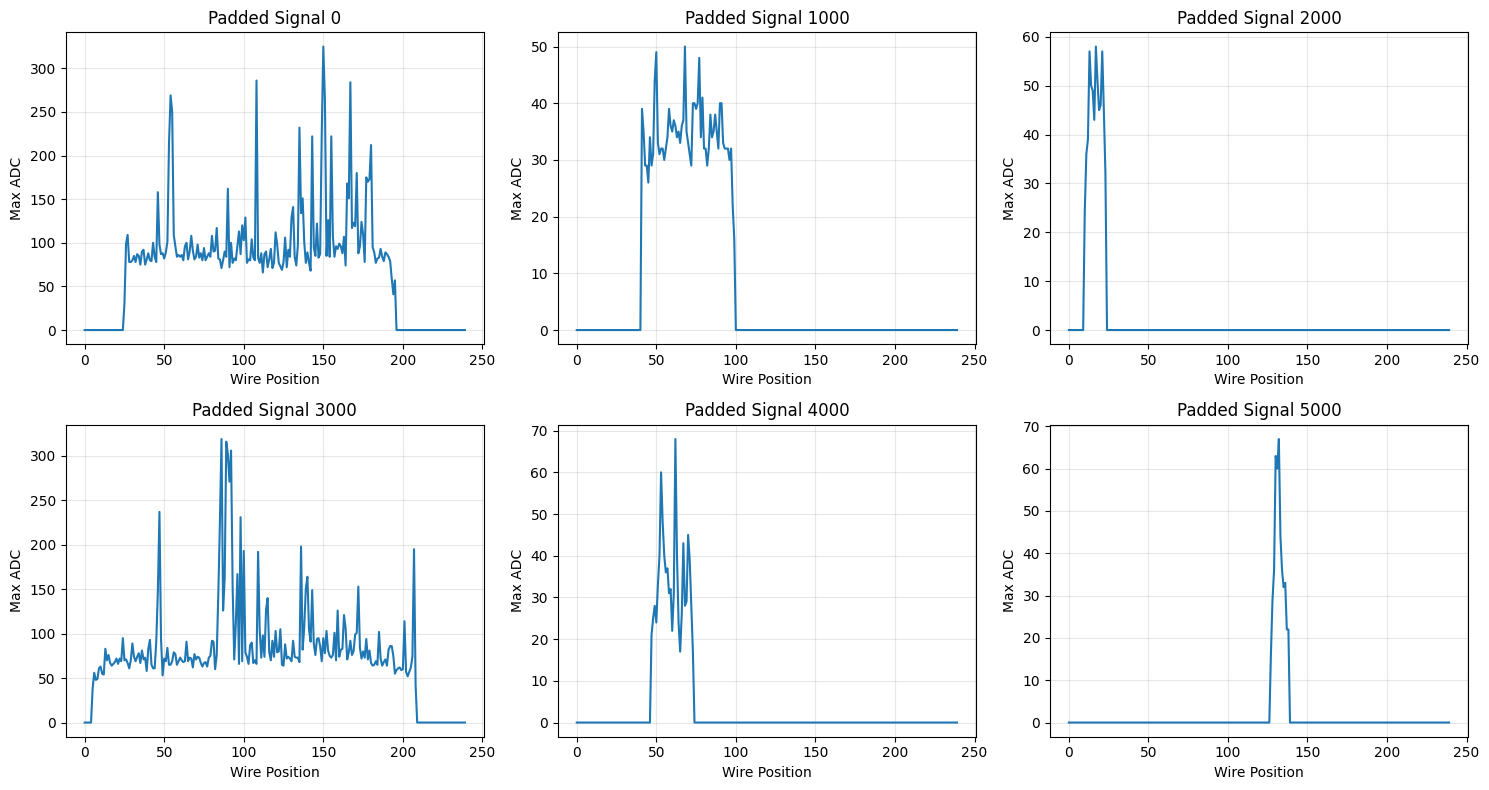

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i in range(6):
    ax = axes[i]
    signal = data[i * 1000]
    ax.plot(signal)
    ax.set_title(f'Padded Signal {i * 1000}')
    ax.set_xlabel('Wire Position')
    ax.set_ylabel('Max ADC')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [75]:
data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [60., 91., 85., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
np.save()